In [1]:
import tensorflow as tf

In [2]:
#Some Basic Imports

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Input
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from scipy.spatial import cKDTree
np.random.seed(123)

import urllib, os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.preprocessing import LabelBinarizer
import glob
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Input, concatenate

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, RMSprop
import argparse
import locale
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras import regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)

In [3]:
TRAIN_PATH = "/content/drive/MyDrive/CovidDataset/Train" 
VAL_PATH = "/content/drive/MyDrive/CovidDataset/Val"

In [4]:
from keras.preprocessing import image

In [5]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Train',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 352 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 40 images belonging to 2 classes.


In [9]:
img_height,img_width = 224,224 
num_classes = 2

#If imagenet weights are being loaded, 
#Input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.vgg19.VGG19(weights= 'imagenet', include_top=True, input_shape= (img_height,img_width,3))

In [10]:
x = base_model.output
predictions = Dense(1, activation= 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early = EarlyStopping(monitor="val_loss", mode="min", patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [12]:
from tensorflow.keras.optimizers import Adam, RMSprop
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=opt)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
hist = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data = validation_generator,
    validation_steps=2,
    callbacks=callbacks_list
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
22/22 [==============================] - 192s 8s/step - loss: 0.6933 - acc: 0.5057 - val_loss: 0.6959 - val_acc: 0.4375 - lr: 0.0010
Epoch 2/50
22/22 [==============================] - 19s 839ms/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.5000 - lr: 0.0010
Epoch 3/50
22/22 [==============================] - 19s 822ms/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6943 - val_acc: 0.4688 - lr: 0.0010
Epoch 4/50
22/22 [==============================] - 19s 836ms/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6914 - val_acc: 0.5625 - lr: 0.0010
Epoch 5/50
22/22 [==============================] - 18s 824ms/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6916 - val_acc: 0.5625 - lr: 0.0010
Epoch 6/50
22/22 [==============================] - 19s 829ms/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6940 - val_acc: 0.4688 - lr: 0.0010
Epoch 7/50
22/22 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.5000
Epoch 7: ReduceLROnPlateau reducing l

In [14]:
def show_cf(y_true, y_pred, class_names, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [18]:
def cnn_evaluation(model, history, train_images, train_labels, test_images, test_labels, class_names, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epch = range(1, len(train_acc) + 1)
    plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
    plt.plot(epch, val_acc, 'g', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epch, train_loss, 'r.', label='Training loss')
    plt.plot(epch, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

In [16]:
trainImagesX = '/content/drive/MyDrive/CovidDataset/Train/Covid'
trainImagesY = '/content/drive/MyDrive/CovidDataset/Train/Normal'

testImagesX = '/content/drive/MyDrive/CovidDataset/Val/Covid'
testImagesY = '/content/drive/MyDrive/CovidDataset/Val/Normal'

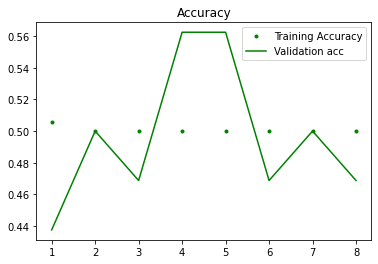

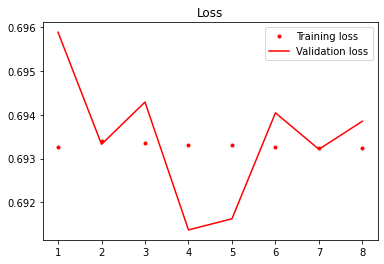

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

cnn_evaluation(model, hist, trainImagesX,trainImagesY,  testImagesX,testImagesY, class_names=['Covid', 'Normal'])

In [20]:
# Test Images

y_actual = []
y_test = []

In [21]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Normal/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Normal/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0, 0])
  y_actual.append(1)

In [22]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Covid/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Covid/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0, 0])
  y_actual.append(0)

In [23]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [24]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
y_test

array([0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737], dtype=float32)

In [39]:
# Train Images

x_actual = []
x_test = []

In [40]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Train/Normal/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Train/Normal/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  x_test.append(p[0, 0])
  x_actual.append(1)

In [41]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Train/Covid/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Train/Covid/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  x_test.append(p[0, 0])
  x_actual.append(0)

In [46]:
x_actual = np.array(x_actual)
x_test = np.array(x_test)

In [47]:
x_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
x_test

array([0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737, 0.4947737,
       0.4947737, 0.4947737, 0.4947737, 0.4947737, 

In [52]:
y_test1 = np.round(abs(y_test))

In [53]:
y_test1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

In [60]:
def get_classification_precision(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return precision

In [63]:
def get_classification_recall(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return recall

In [64]:
recall = get_classification_recall(y_actual, y_test)

In [65]:
recall

array([1., 0.])

In [66]:
def get_classification_thresholds(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return thresholds

In [67]:
thresholds = get_classification_thresholds(y_actual, y_test)

In [68]:
thresholds

array([0.4947737], dtype=float32)

In [61]:
precision = get_classification_precision(y_actual, y_test)

In [62]:
precision

array([0.5, 1. ])

In [58]:
metric = get_classification_metric(y_actual, y_test)

In [59]:
metric

0.6666666666666666

In [81]:
model.save("/content/drive/MyDrive/Major Project Models/VGG_19_Model.h5")